# Set up the plotting environment

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from Swarm2D import *
import scipy.optimize as optimize

### Defining some objective functions to be used

The objective function to be used in this instance is the Rosenbrock function.

_NOTE: if you want to use your own objective function, it must be able to take in a particle position, or set of particle positions (positions given by the row vectors, particle given by the row number), and return an $N \times 1$ array with the N being the number of particles_

In [3]:
def rastrigin_func(position):
    if position.ndim == 1:
        position = position.reshape([1, position.shape[0]])
    output = np.zeros([position.shape[0], 1])
    for i in range(position.shape[0]):
        output[i,0] = position[i,0]**2 - 10*np.cos(np.pi*2*position[i,0])
        output[i,0] += position[i,1]**2 - 10*np.cos(np.pi*2*position[i,1])
        outoutput[i,0] += 20
    return output

In [4]:
def rosen_func(position):
    if position.ndim == 1:
        position = position.reshape([1, position.shape[0]])
    output = np.zeros([position.shape[0], 1])
    for i in range(position.shape[0]):
        output[i,0] = optimize.rosen(position[i,:])
    return output

To actually use an objective function, create an ObjectiveFunction object using the function definition and the position of its minimum. This allows the functions to determine how close to the optimum the algorithm has come

In [5]:
ros_obj_func = ObjectiveFunction(rosen_func, np.array([1, 1]))     #rosenbrock ObjectiveFunction object, with min at [1,1]

# Parameter investigation

## Stability (random component removed)

The first thing to do is validate the findings of Trelea. This described the behaviour of the deterministic version of the algorithm. For the 

#### a = 0.9, b = 0.1:   Harmonic oscillations, slow convergence

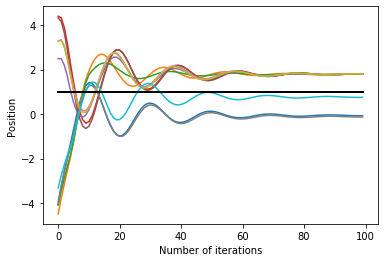

In [6]:
investigate(0.9, 0.1, ros_obj_func, niter=100, deterministic=True)

#### a = 0.1, b = 0.1:   Non-oscillatory convergence

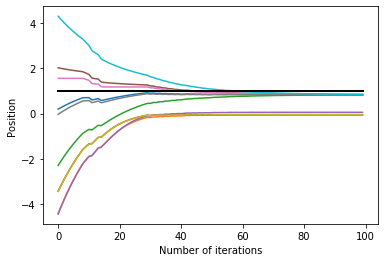

In [7]:
investigate(0.1, 0.1, ros_obj_func, niter=100, deterministic=True)

#### a = 1, b = 4:   Marginal stability

This being the the intersection of two points on the border of stability, numbers were moved just inside: perhaps having two poles at zero. Note that this is the 

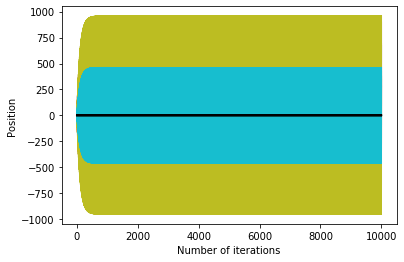

In [8]:
investigate(0.99, 3.98, ros_obj_func, niter=10000, deterministic=True)

#### a = 0, b = 2:   Marginally stable behaviour

According to theory, with $a=0$, the point of marginal stability should occur when $c_1 + c_2 = 2$. This is observed as an instantaneous collapsing of all variables

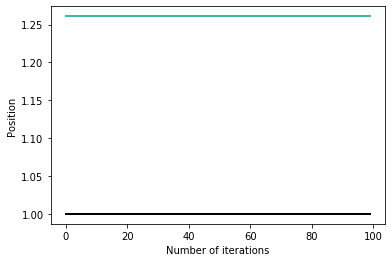

In [9]:
investigate(0, 2, ros_obj_func, niter=100, deterministic=True)

#### Eliminating omega from the equation, and using standard values for $c_1$ and $c_2

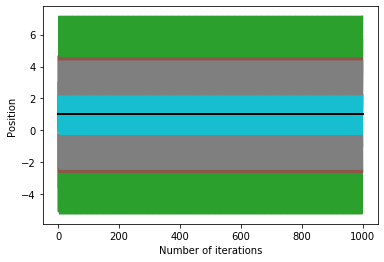

In [10]:
investigate(1, 2, ros_obj_func, niter=1000, deterministic=True)

## Stability (reintroduce random component)

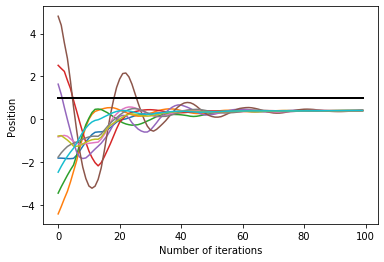

In [11]:
investigate(0.9, 0.1, ros_obj_func, niter=100)

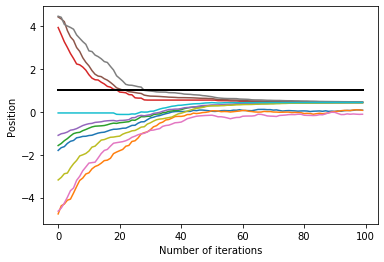

In [12]:
investigate(0.1, 0.1, ros_obj_func, niter=100)

It seems that stability margins seem not to hold in the upper region of $\omega$, presumably because the unstable regions dominate the stable ones.

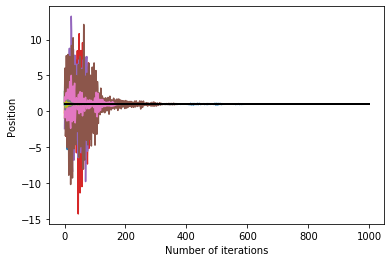

In [13]:
investigate(0.9, 1, ros_obj_func, niter=1000)

Marginal stability appears to be maintained when $\omega$ is zero however. Note that the optimisation ability of the algorithm is still poor

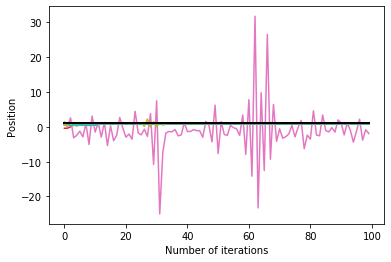

In [14]:
investigate(0, 2, ros_obj_func, niter=100)

It appears that the standard values of $c_1 = c_2 = 2$, without omega, leads to oscillatory behaviour for the particle

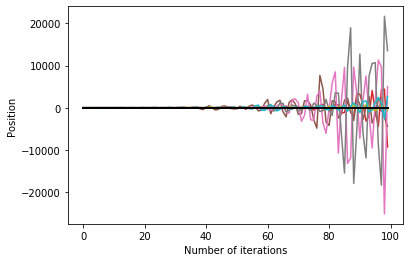

In [15]:
investigate(1, 2, ros_obj_func, niter=100)

## Investigating performance for different convergence rates

For this investigation, will be looking at the state of the algorithm after 20, 50 and 500 iterations. Particle spread will be analysed by the variance of the particles around their average. Optimization performance will be analysed by the error of g_best from the true optimum.

### Testing a variety of parameters on the Rosenbrock function

The following code scans through a variety of functions and saves it in a big list. The numerical_investigate function returns an object with variables such as gbest50, gbest100 (performance of gbest after 50 or 100 iterations) and var50, var100 (variance of particle positions after 50 or 100 iterations). This is stored in a list of lists.

_The code below checks out a lot of values (400), and takes about 5 mins to run, as each combination of parameters averages over 50 runs._

In [17]:
a_list = np.linspace(0,1,20)               #this checks out 20 values
b_list = np.linspace(0.5, 4.0, 20)         #this checks out 20 values
A, B = np.meshgrid(a_list, b_list)

myObjFunc = ObjectiveFunction(rosen_func, np.array([1, 1]))

return_save = np.zeros([b_list.shape[0], a_list.shape[0]]).tolist()

for b_ind, b_val in enumerate(b_list):
    return_save.append([])
    for a_ind, a_val in enumerate(a_list):
        print(".", end = '')
        return_save[b_ind][a_ind] = numerical_investigate(a_val, b_val, myObjFunc)
    print("Iteration %d/%d complete" % (b_ind + 1, len(b_list)))

....................Iteration 1/20 complete
....................Iteration 2/20 complete
....................Iteration 3/20 complete
....................Iteration 4/20 complete
....................Iteration 5/20 complete
....................Iteration 6/20 complete
....................Iteration 7/20 complete
....................Iteration 8/20 complete
....................Iteration 9/20 complete
....................Iteration 10/20 complete
....................Iteration 11/20 complete
....................Iteration 12/20 complete
....................Iteration 13/20 complete
....................Iteration 14/20 complete
....................Iteration 15/20 complete
....................Iteration 16/20 complete
....................Iteration 17/20 complete
....................Iteration 18/20 complete
....................Iteration 19/20 complete
....................Iteration 20/20 complete


## Extracting the info and plotting

The lines of code below will plot whatever you want to have a look at. The only things you need to change are the variable you're looking at (e.g. gbest20, gbest50, var50) and the plotting options. I'm current plotting the log of the values, with the active range between $10^{-6}$ and $10^{2}$. 

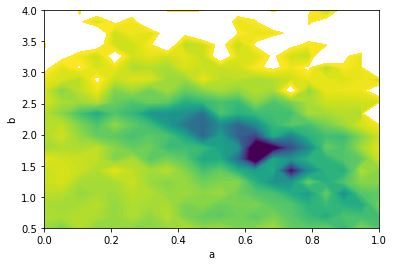

In [18]:
to_check = np.zeros(A.shape)

for ind_b, _ in enumerate(b_list):
    for ind_a, _ in enumerate(a_list):
        to_check[ind_b, ind_a] = return_save[ind_b][ind_a].gbest100 #change this parameter to check out something else

plt.contourf(A, B, np.log(to_check), levels = np.linspace(-6,2,100), extend = 'min') #you can add extend = 'max', 'min', or 'both' to fill in blanks
plt.xlabel('a'); plt.ylabel('b')
plt.show()

In [ ]:
As you can see, the 

### Une Bug

Note: There seems to be something funny going on here with the function that should probably be debugged (have to run multiple times to observe the bug. Have no idea why it's there):

In [22]:
cheeky = numerical_investigate(1, 3.22222, myObjFunc)
cheeky.gbest100

335106944.9694813